In [1]:
import bs4
import requests
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from IPython.display import display

In [6]:
def get_basketball_stats(link='https://en.wikipedia.org/wiki/LeBron_James'):
    # read the webpage
    response = requests.get(link)
    # create a BeautifulSoup object to parse the HTML
    soup = bs4.BeautifulSoup(response.text, 'html.parser')
    # the player stats are defined  with the attribute CSS class set to 'wikitable sortable';
    #therefore we create a tag object "table"
    table = soup.find(class_='wikitable sortable')

    #the headers of the table are the first table row (tr) we create a tag object that has the first row
    headers = table.tr
    titles = headers.find_all('abbr')
    #we create a dictionary  and pass the table headers as the keys
    data = {title['title']: [] for title in titles}
    #we will store each column as a list in a dictionary, the header of the column will be the dictionary key

    #we iterate over each table row by fining each table tag tr and assign it to the objed
    for row in table.find_all('tr')[1:]:
        #we iterate over each cell in the table, as each cell corresponds to a different column we all obtain the correspondin key corresponding the column n
        for key, a in zip(data.keys(),row.find_all('td')[2:]):
            data[key].append(''.join(c for c in a.text if (c.isdigit() or c == '.')))

        # we remove extra rows by finding the smallest list
        Min = min([len(x) for x in data.values()])
        #we convert the elements in the key to floats
        for key in data.keys():
            data[key] = list(map(lambda x: float(x), data[key][:Min]))
    return data


In [7]:
def get_basketball_stats(link='https://en.wikipedia.org/wiki/Stephen_Curry'):
    # read the webpage
    response = requests.get(link)
    # create a BeautifulSoup object to parse the HTML
    soup = bs4.BeautifulSoup(response.text, 'html.parser')
    # the player stats are defined  with the attribute CSS class set to 'wikitable sortable';
    #therefore we create a tag object "table"
    table = soup.find(class_='wikitable sortable')

    #the headers of the table are the first table row (tr) we create a tag object that has the first row
    headers = table.tr
    titles = headers.find_all('abbr')
    #we create a dictionary  and pass the table headers as the keys
    data = {title['title']: [] for title in titles}
    #we will store each column as a list in a dictionary, the header of the column will be the dictionary key

    #we iterate over each table row by fining each table tag tr and assign it to the objed
    for row in table.find_all('tr')[1:]:
        #we iterate over each cell in the table, as each cell corresponds to a different column we all obtain the correspondin key corresponding the column n
        for key, a in zip(data.keys(),row.find_all('td')[2:]):
            data[key].append(''.join(c for c in a.text if (c.isdigit() or c == '.')))

        # we remove extra rows by finding the smallest list
        Min = min([len(x) for x in data.values()])
        #we convert the elements in the key to floats
        for key in data.keys():
            data[key] = list(map(lambda x: float(x), data[key][:Min]))
    return data

In [8]:
links=['https://en.wikipedia.org/wiki/LeBron_James'\
       ,'https://en.wikipedia.org/wiki/Stephen_Curry']
names=['LeBron James','Stephan curry']

In [9]:
LeBron_James_dict = get_basketball_stats(links[0])
Stephan_Curry_dict = get_basketball_stats(links[1])

In [10]:
Stephan_Curry_dict

{'3-point field-goal percentage': [0.437,
  0.442,
  0.455,
  0.453,
  0.424,
  0.443,
  0.454,
  0.411,
  0.423,
  0.437,
  0.245],
 'Assists per game': [5.9, 5.8, 5.3, 6.9, 8.5, 7.7, 6.7, 6.6, 6.1, 5.2, 6.6],
 'Blocks per game': [0.2, 0.3, 0.3, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.4],
 'Field goal percentage': [0.462,
  0.48,
  0.49,
  0.451,
  0.471,
  0.487,
  0.504,
  0.468,
  0.495,
  0.472,
  0.402],
 'Free-throw percentage': [0.885,
  0.934,
  0.809,
  0.9,
  0.885,
  0.914,
  0.908,
  0.898,
  0.921,
  0.916,
  1.0],
 'Games played': [80.0,
  74.0,
  26.0,
  78.0,
  78.0,
  80.0,
  79.0,
  79.0,
  51.0,
  69.0,
  5.0],
 'Games started': [77.0,
  74.0,
  23.0,
  78.0,
  78.0,
  80.0,
  79.0,
  79.0,
  51.0,
  69.0,
  5.0],
 'Minutes per game': [36.2,
  33.6,
  28.2,
  38.2,
  36.5,
  32.7,
  34.2,
  33.4,
  32.0,
  33.8,
  27.8],
 'Points per game': [17.5,
  18.6,
  14.7,
  22.9,
  24.0,
  23.8,
  30.1,
  25.3,
  26.4,
  27.3,
  20.8],
 'Rebounds per game': [4.5, 3.9, 3.4, 4.0,

In [11]:
LeBron_James_dict

{'3-point field-goal percentage': [0.29,
  0.351,
  0.335,
  0.319,
  0.315,
  0.344,
  0.333,
  0.33,
  0.362,
  0.406,
  0.379,
  0.354,
  0.309,
  0.363,
  0.367,
  0.339,
  0.348],
 'Assists per game': [5.9,
  7.2,
  6.6,
  6.0,
  7.2,
  7.2,
  8.6,
  7.0,
  6.2,
  7.3,
  6.4,
  7.4,
  6.8,
  8.7,
  9.1,
  8.3,
  10.2],
 'Blocks per game': [0.7,
  0.7,
  0.8,
  0.7,
  1.1,
  1.1,
  1.0,
  0.6,
  0.8,
  0.9,
  0.3,
  0.7,
  0.6,
  0.6,
  0.9,
  0.6,
  0.5],
 'Field goal percentage': [0.417,
  0.472,
  0.48,
  0.476,
  0.484,
  0.489,
  0.503,
  0.51,
  0.531,
  0.565,
  0.567,
  0.488,
  0.52,
  0.548,
  0.542,
  0.51,
  0.493],
 'Free-throw percentage': [0.754,
  0.75,
  0.738,
  0.698,
  0.712,
  0.78,
  0.767,
  0.759,
  0.771,
  0.753,
  0.75,
  0.71,
  0.731,
  0.674,
  0.731,
  0.665,
  0.693],
 'Games played': [79.0,
  80.0,
  79.0,
  78.0,
  75.0,
  81.0,
  76.0,
  79.0,
  62.0,
  76.0,
  77.0,
  69.0,
  76.0,
  74.0,
  82.0,
  55.0,
  67.0],
 'Games started': [79.0,
  80.0,

In [12]:
Lj_table = pd.DataFrame(LeBron_James_dict)
Sc_table = pd.DataFrame(Stephan_Curry_dict)

In [13]:
Lj_table

,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,79.0,79.0,39.5,0.417,0.290,0.754,5.5,5.9,1.6,0.7,20.9
1,80.0,80.0,42.4,0.472,0.351,0.750,7.4,7.2,2.2,0.7,27.2
2,79.0,79.0,42.5,0.480,0.335,0.738,7.0,6.6,1.6,0.8,31.4
3,78.0,78.0,40.9,0.476,0.319,0.698,6.7,6.0,1.6,0.7,27.3
4,75.0,74.0,40.4,0.484,0.315,0.712,7.9,7.2,1.8,1.1,30.0
5,81.0,81.0,37.7,0.489,0.344,0.780,7.6,7.2,1.7,1.1,28.4
6,76.0,76.0,39.0,0.503,0.333,0.767,7.3,8.6,1.6,1.0,29.7
7,79.0,79.0,38.8,0.510,0.330,0.759,7.5,7.0,1.6,0.6,26.7
8,62.0,62.0,37.5,0.531,0.362,0.771,7.9,6.2,1.9,0.8,27.1
9,76.0,76.0,37.9,0.565,0.406,0.753,8.0,7.3,1.7,0.9,26.8


In [14]:
Sc_table

,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,80.0,77.0,36.2,0.462,0.437,0.885,4.5,5.9,1.9,0.2,17.5
1,74.0,74.0,33.6,0.480,0.442,0.934,3.9,5.8,1.5,0.3,18.6
2,26.0,23.0,28.2,0.490,0.455,0.809,3.4,5.3,1.5,0.3,14.7
3,78.0,78.0,38.2,0.451,0.453,0.900,4.0,6.9,1.6,0.2,22.9
4,78.0,78.0,36.5,0.471,0.424,0.885,4.3,8.5,1.6,0.2,24.0
5,80.0,80.0,32.7,0.487,0.443,0.914,4.3,7.7,2.0,0.2,23.8
6,79.0,79.0,34.2,0.504,0.454,0.908,5.4,6.7,2.1,0.2,30.1
7,79.0,79.0,33.4,0.468,0.411,0.898,4.5,6.6,1.8,0.2,25.3
8,51.0,51.0,32.0,0.495,0.423,0.921,5.1,6.1,1.6,0.2,26.4
9,69.0,69.0,33.8,0.472,0.437,0.916,5.3,5.2,1.3,0.4,27.3


In [15]:
list_table =[Lj_table, Sc_table]

i = 0
for name in names:
    print(name)
    display(list_table[i].head())
    i += 1

LeBron James


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,79.0,79.0,39.5,0.417,0.290,0.754,5.5,5.9,1.6,0.7,20.9
1,80.0,80.0,42.4,0.472,0.351,0.750,7.4,7.2,2.2,0.7,27.2
2,79.0,79.0,42.5,0.480,0.335,0.738,7.0,6.6,1.6,0.8,31.4
3,78.0,78.0,40.9,0.476,0.319,0.698,6.7,6.0,1.6,0.7,27.3
4,75.0,74.0,40.4,0.484,0.315,0.712,7.9,7.2,1.8,1.1,30.0


Stephan curry


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,80.0,77.0,36.2,0.462,0.437,0.885,4.5,5.9,1.9,0.2,17.5
1,74.0,74.0,33.6,0.480,0.442,0.934,3.9,5.8,1.5,0.3,18.6
2,26.0,23.0,28.2,0.490,0.455,0.809,3.4,5.3,1.5,0.3,14.7
3,78.0,78.0,38.2,0.451,0.453,0.900,4.0,6.9,1.6,0.2,22.9
4,78.0,78.0,36.5,0.471,0.424,0.885,4.3,8.5,1.6,0.2,24.0


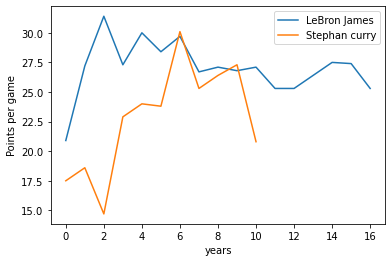

In [16]:
j = 0
for name in names:
    plt.plot(list_table[j][['Points per game']],label=name)
    plt.legend()
    plt.xlabel('years')
    plt.ylabel('Points per game')

    j += 1

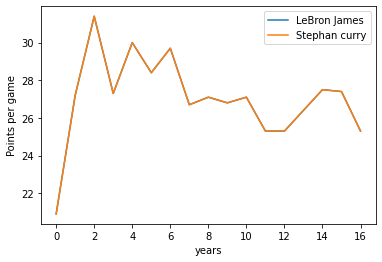

In [17]:
for name in names:
    plt.plot(list_table[0][['Points per game']],label=name)
    plt.legend()
    plt.xlabel('years')
    plt.ylabel('Points per game')

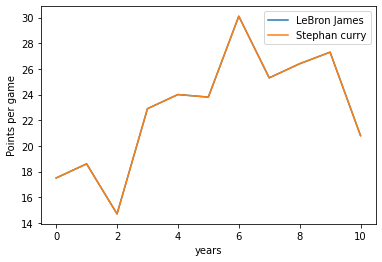

In [18]:
for name in names:
    plt.plot(list_table[1][['Points per game']],label=name)
    plt.legend()
    plt.xlabel('years')
    plt.ylabel('Points per game')

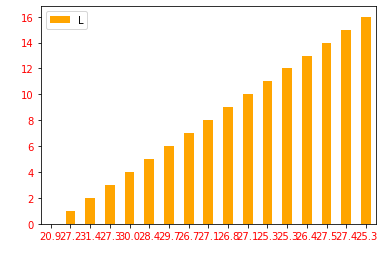

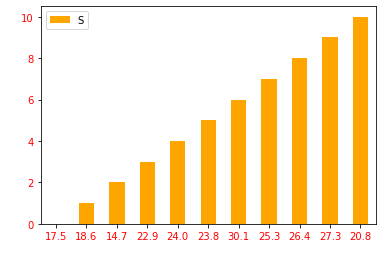

In [19]:

j = 0

list_table =[Lj_table, Sc_table]
for name in names:
  list_table[j].reset_index().plot(x="Points per game", y=["index"],kind="bar", color=['orange'])
  plt.legend(name)
  plt.xlabel("Points per game",color='white')
  plt.ylabel("Years",color='white')
  plt.xticks(rotation=0,color='red')
  plt.yticks(color='red')
  j+=1